In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(6, kernel_size = (5, 5),padding = "valid" ,activation = 'tanh', input_shape = (28, 28, 1)))
model.add(layers.AveragePooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(layers.Conv2D(16, kernel_size = (5, 5),padding = "valid" ,activation = 'tanh'))
model.add(layers.AveragePooling2D(pool_size = (2, 2), strides = 2, padding = "valid"))

model.add(Flatten())
model.add(Dense(units = 120, activation = "tanh"))
model.add(Dense(units = 84, activation = "tanh"))
model.add(Dense(units = 10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])

history = model.fit(X_train, y_train, batch_size = 256, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9884 - val_loss: 0.0494
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9887 - val_loss: 0.0459
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9999 - loss: 4.2798e-04 - val_accuracy: 0.9891 - val_loss: 0.0451
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 1.0000 - loss: 2.2928e-04 - val_accuracy: 0.9890 - val_loss: 0.0456
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 1.0000 - loss: 1.7701e-04 - val_accuracy: 0.9890 - val_loss: 0.0463
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9869 - val_loss: 0.0583
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9871 - val_loss: 0.0521
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 1.0000 - los

313/313 - 2s - 5ms/step - accuracy: 0.9879 - loss: 0.0500


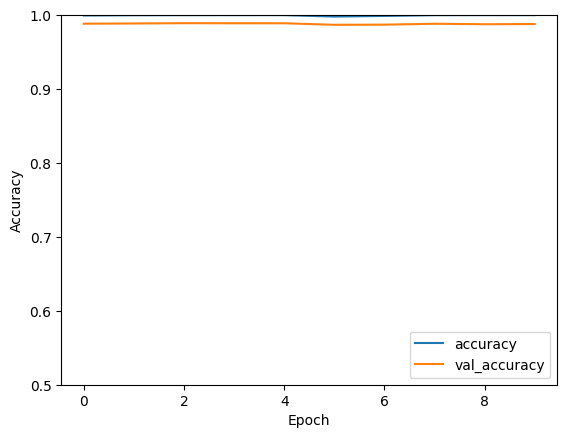

In [26]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

In [27]:
print(test_acc)

0.9879000186920166


In [28]:
# Evaluate model on validation data
_, evaluation_score = model.evaluate(X_test, y_test)
print(f'Evaluation Score: {int(evaluation_score * 100)} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9853 - loss: 0.0618
Evaluation Score: 98 %


In [31]:
model.save("LeNet5.keras")